In [1]:
import sys
import os
sys.path.insert(0, os.path.join("..", "includes"))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()

🎉 Running in a Virtual environment


In [2]:
if deep_atlas.environment == 'VIRTUAL':
    !pipenv install ipykernel==6.28.0
    !pipenv install scikit-learn==1.4.1.post1 pandas==2.2.1 matplotlib==3.8.3 umap-learn
if deep_atlas.environment == 'COLAB':
    %pip install scikit-learn==1.4.1.post1 pandas==2.2.1 matplotlib==3.8.3


Installing ipykernel==6.28.0...
Resolving ipykernel==6.28.0...
[    ] Installing...
Installation Succeeded
[    ] Installing ipykernel...
[    ] Installing ipykernel...

Installing dependencies from Pipfile.lock (8861a5)...
Installing scikit-learn==1.4.1.post1...
Resolving scikit-learn==1.4.1.post1...
[    ] Installing...
Installation Succeeded
[    ] Installing scikit-learn...
[    ] Installing scikit-learn...

Installing pandas==2.2.1...
Resolving pandas==2.2.1...
[    ] Installing...
Installation Succeeded
[    ] Installing pandas...
[    ] Installing pandas...

Installing matplotlib==3.8.3...
Resolving matplotlib==3.8.3...
[    ] Installing...
Installation Succeeded
[    ] Installing matplotlib...
[    ] Installing matplotlib...

Installing umap-learn...
Resolving umap-learn...
[    ] Installing...
Installation Succeeded
[    ] Installing umap-learn...
[    ] Installing umap-learn...

Installing dependencies from Pipfile.lock (8861a5)...


In [3]:
# Data loading
import random
from sklearn.datasets import fetch_20newsgroups_vectorized

# Creating training/testing sets
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score
import time

# Inspecting data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Suppress scientific notation in printed output

np.set_printoptions(suppress=True)

Load the data

In [4]:
training = fetch_20newsgroups_vectorized(subset="train")
test = fetch_20newsgroups_vectorized(subset="test")



In [5]:
training

{'data': <11314x130107 sparse matrix of type '<class 'numpy.float64'>'
 	with 1787565 stored elements in Compressed Sparse Row format>,
 'target': array([17,  7, 10, ..., 14, 12, 11]),
 'frame': None,
 'target_names': ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 'feature_names': array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
       dtype=object),
 'DESCR': '.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand

Look at a single vector

In [6]:
training['data'][0]


<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 340 stored elements in Compressed Sparse Row format>

Get vector & feature count

In [7]:
num_vectors = training['data'].shape[0]
print(f"There are {num_vectors} vectors in the data.")

num_features = training['data'].shape[1]
print(f"There are {num_features} features in the data.")

There are 11314 vectors in the data.
There are 130107 features in the data.


Log the data

In [8]:
import umap

c:\Users\marcm\source\repos\deepAtlas\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Use UMAP to Reduce the dimensionality to be able to plot it


<details>
  <summary>UMAP Description</summary>

UMAP is a dimension reduction technique that is particularly effective for visualizing clusters or groups of data points and their relative proximities. It's primary advantage over t-SNE is that it preserves more of the global structure.

It's based on manifold learning techniques and mathematics including Riemannian geometry and algebraic topology.

> In the context of UMAP and other dimensionality reduction techniques, a manifold refers to a shape or structure in high-dimensional space that can be approximated as a lower-dimensional space locally.
>
> For example, consider a piece of paper: it's a 2D object living in our 3D world. If you crumple that piece of paper into a ball, it's still a 2D surface, but now it's embedded in 3D space in a complex way. That crumpled piece of paper is an example of a 2D manifold in 3D space.
>
> In the case of UMAP, it assumes that the high-dimensional data lies on a manifold, and it tries to learn the structure of this manifold. It then uses this learned structure to project the data into a lower-dimensional space in a way that preserves as much of the original data structure as possible. This is why UMAP is particularly good at preserving both local and global structures in the data.

UMAP is particularly effective in scenarios where:

1. You want to preserve the global structure of the data while reducing dimensions.
1. You are dealing with very large datasets. UMAP is faster than t-SNE, making it more suitable for larger datasets.
1. You want more consistent results. Unlike t-SNE, which can produce different results with different runs due to its randomness, UMAP tends to produce more consistent results.

Limitations

1. **Complexity**: UMAP is based on some complex mathematical concepts, which can make it harder to reason about than PCA or t-SNE.
2. **Hyperparameters**: Like t-SNE, UMAP also has a few key hyperparameters (like the number of neighbors and the minimum distance) that can significantly affect the resulting visualization. It might require some trial and error to find the best settings.
3. **No Inverse Mapping**: Similar to t-SNE, UMAP does not provide an explicit function to map new, unseen data into the same space. However, recent versions of UMAP have added some support for this feature.
4. **Assumptions**: UMAP makes some assumptions about the data, such as it being uniformly distributed on a Riemannian manifold. If these assumptions are not met, the results may not be meaningful.

</details>


Reduce to 2 dimensions

In [9]:
# Model 130107-dimensional data as 2-dimensional data
X_umap = umap.UMAP(min_dist=0.3, random_state=42).fit_transform(training.data)

c:\Users\marcm\source\repos\deepAtlas\.venv\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Define a function to plot the 2 dimensions

In [10]:
def plot_embedding(data, y, title):
    # `data` is a 2D array of shape (n_samples, 2)
    # `y` is a 1D array of shape (n_samples,), representing the labels

    fig = plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        # Value of data in the first dimension
        data[:, 0],
        # Value of data in the second dimension
        data[:, 1],
        # Color of each point, representing the label
        c=y.astype(int),
        # Use a categorical color map with 10 distinct colors
        cmap="tab20",
        # size of each point
        s=1,
    )
    # Add a color bar to the right of the plot
    plt.colorbar(scatter)

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.show()





Call this method

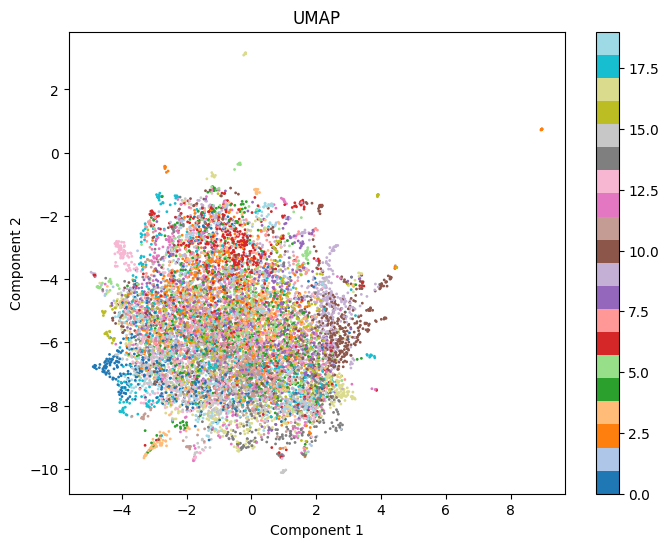

In [21]:
# Plot the UMAP projection
plot_embedding(X_umap, training.target, title="UMAP")

# Do some 3d plotting to get a better idea of the data

Define a function for 3d plotting

Use UMAP to reduce dimensions to 3

In [25]:
# Model 130107-dimensional data as 3-dimensional data
X_umap_3d = umap.UMAP(n_components=3, min_dist=0.3, random_state=42).fit_transform(training.data)

/Users/nakey/.local/share/virtualenvs/BigBrainTeam-JP-_kpQS/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Define a function to map them

In [27]:
def plot_embedding_3d(data, y, title):
    # `data` is a 3D array of shape (n_samples, 2)
    # `y` is a 1D array of shape (n_samples,), representing the labels

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection="3d")
    scatter = ax.scatter(
        # Value of data in the first dimension
        data[:, 0],
        # Value of data in the second dimension
        data[:, 1],
        # Value of data in the third dimension
        data[:, 2],
        # Color of each point, representing the label
        c=y.astype(int),
        # Use a categorical color map with 10 distinct colors
        cmap="tab10",
        # Size of each point
        s=1,
    )

    # Add a color bar to the right of the plot
    plt.colorbar(scatter)

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.show()

Call the method

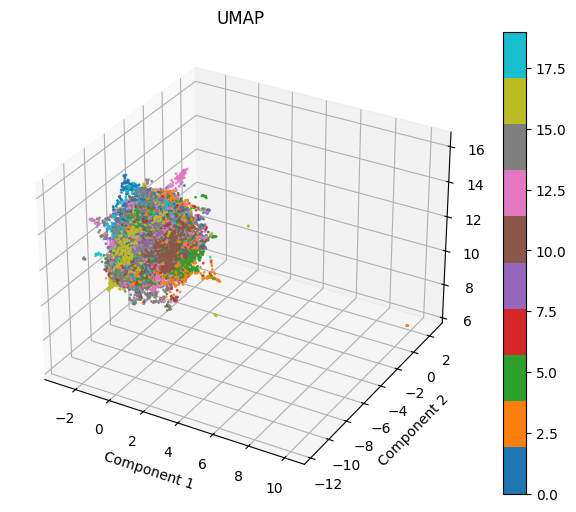

In [29]:
plot_embedding_3d(X_umap_3d, training.target, title="UMAP")

# 🚂🚂 CHOO CHOO

Create a method to support testing many models

In [11]:
results = {}


def train_and_evaluate(name, classifier_instance, X_train, y_train, X_test, y_test ):
    print(f"Training {name}...")

    start_time = time.time()

    classifier_instance.fit(X_train, y_train)

    training_time = time.time() - start_time
    print(f"Training time: {training_time:.4f} seconds")

    # Predict using the testing data
    y_pred = classifier_instance.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Store the results
    results[name] = {
        "model": classifier_instance,
        "Accuracy": accuracy,
        "Training Time": training_time,
    }

Call train_and_evaluate with one k nearest neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

In [18]:
train_and_evaluate(
    "K-Nearest Neighbors",
    KNeighborsClassifier(n_neighbors=5, weights="uniform"),
    training.data,
    training.target,
    test.data,
    test.target,
)

Training K-Nearest Neighbors...
Training time: 0.0152 seconds


KeyboardInterrupt: 

Training K-Nearest Neighbors...
Training time: 0.0110 seconds
Accuracy: 0.4084

Call it with a bunch of different classifiers

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
logisticRegression = LogisticRegression(
    max_iter=10000, solver="lbfgs", multi_class="multinomial"
)
mLPClassifier = MLPClassifier(max_iter=5)

svc = SVC()

classifiers = [
    {"name": "logisticRegression", "instance": logisticRegression},
    {"name": "mLPClassifier", "instance": mLPClassifier},
    {"name": "svc", "instance": svc}
]

In [15]:




for classifier in classifiers:
  train_and_evaluate(
    classifier["name"],
    classifier["instance"],
    training.data,
    training.target,
    test.data,
    test.target,
)

NameError: name 'train_and_evaluate' is not defined

Notes:

- When you make a cell that runs many models,  you have to re-run them all when you just want to tweak one. 
- For time sake, probably better to do initial tests on a smaller subset of data so you don't waste time getting initial benchmarks on huge amounts of data

( )

## Continued Evaluation of models

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [16]:
confused_results = {}


def train_and_evaluate_with_confusion(name, classifier_instance, X_train, y_train, X_test, y_test ):
    print(f"Training {name}...")

    start_time = time.time()

    classifier_instance.fit(X_train, y_train)

    training_time = time.time() - start_time
    print(f"Training time: {training_time:.4f} seconds")

    # Predict using the testing data
    y_pred = classifier_instance.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")

    # Assuming y_true and y_pred are your true labels and predicted labels respectively
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print(conf_matrix)

    # Store the results
    confused_results[name] = {
        "model": classifier_instance,
        "Accuracy": accuracy,
        "Training Time": training_time,
    }

### Logisic Regression

Training logisticRegression...


Training time: 37.0675 seconds
Accuracy: 0.7257
Precision: 0.7273


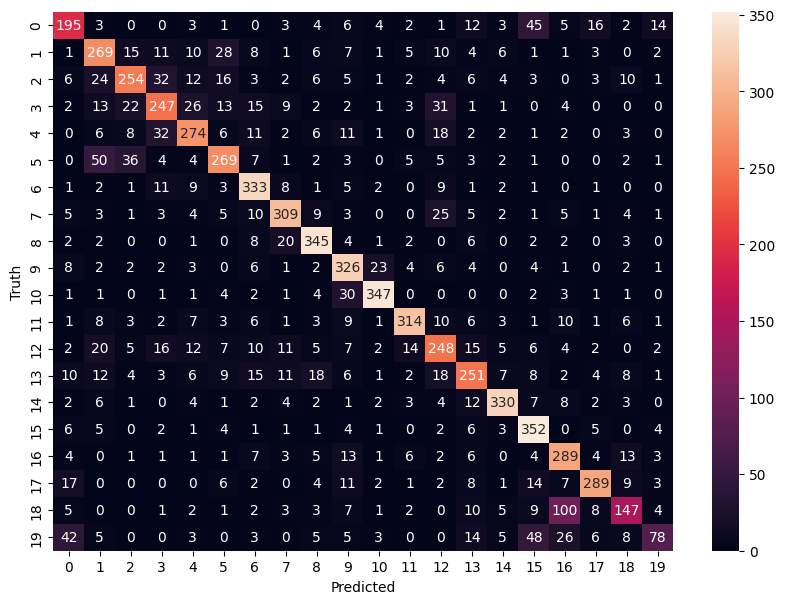

[[195   3   0   0   3   1   0   3   4   6   4   2   1  12   3  45   5  16
    2  14]
 [  1 269  15  11  10  28   8   1   6   7   1   5  10   4   6   1   1   3
    0   2]
 [  6  24 254  32  12  16   3   2   6   5   1   2   4   6   4   3   0   3
   10   1]
 [  2  13  22 247  26  13  15   9   2   2   1   3  31   1   1   0   4   0
    0   0]
 [  0   6   8  32 274   6  11   2   6  11   1   0  18   2   2   1   2   0
    3   0]
 [  0  50  36   4   4 269   7   1   2   3   0   5   5   3   2   1   0   0
    2   1]
 [  1   2   1  11   9   3 333   8   1   5   2   0   9   1   2   1   0   1
    0   0]
 [  5   3   1   3   4   5  10 309   9   3   0   0  25   5   2   1   5   1
    4   1]
 [  2   2   0   0   1   0   8  20 345   4   1   2   0   6   0   2   2   0
    3   0]
 [  8   2   2   2   3   0   6   1   2 326  23   4   6   4   0   4   1   0
    2   1]
 [  1   1   0   1   1   4   2   1   4  30 347   0   0   0   0   2   3   1
    1   0]
 [  1   8   3   2   7   3   6   1   3   9   1 314  10   6   3   1

In [26]:
train_and_evaluate_with_confusion(
  "logisticRegression",
  logisticRegression,
  training.data,
  training.target,
  test.data,
  test.target,
)

Training K-Nearest Neighbors...
Training time: 0.0120 seconds


Accuracy: 0.4084
Precision: 0.4892


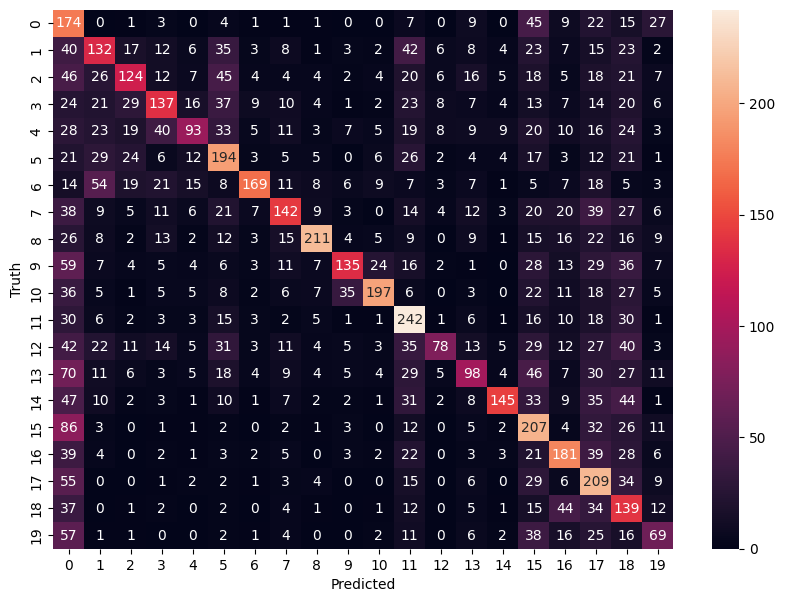

[[174   0   1   3   0   4   1   1   1   0   0   7   0   9   0  45   9  22
   15  27]
 [ 40 132  17  12   6  35   3   8   1   3   2  42   6   8   4  23   7  15
   23   2]
 [ 46  26 124  12   7  45   4   4   4   2   4  20   6  16   5  18   5  18
   21   7]
 [ 24  21  29 137  16  37   9  10   4   1   2  23   8   7   4  13   7  14
   20   6]
 [ 28  23  19  40  93  33   5  11   3   7   5  19   8   9   9  20  10  16
   24   3]
 [ 21  29  24   6  12 194   3   5   5   0   6  26   2   4   4  17   3  12
   21   1]
 [ 14  54  19  21  15   8 169  11   8   6   9   7   3   7   1   5   7  18
    5   3]
 [ 38   9   5  11   6  21   7 142   9   3   0  14   4  12   3  20  20  39
   27   6]
 [ 26   8   2  13   2  12   3  15 211   4   5   9   0   9   1  15  16  22
   16   9]
 [ 59   7   4   5   4   6   3  11   7 135  24  16   2   1   0  28  13  29
   36   7]
 [ 36   5   1   5   5   8   2   6   7  35 197   6   0   3   0  22  11  18
   27   5]
 [ 30   6   2   3   3  15   3   2   5   1   1 242   1   6   1  16

In [27]:
train_and_evaluate_with_confusion(
    "K-Nearest Neighbors",
    KNeighborsClassifier(n_neighbors=5, weights="uniform"),
    training.data,
    training.target,
    test.data,
    test.target,
)

Training svc...


Training time: 290.9355 seconds
Accuracy: 0.7447
Precision: 0.7539


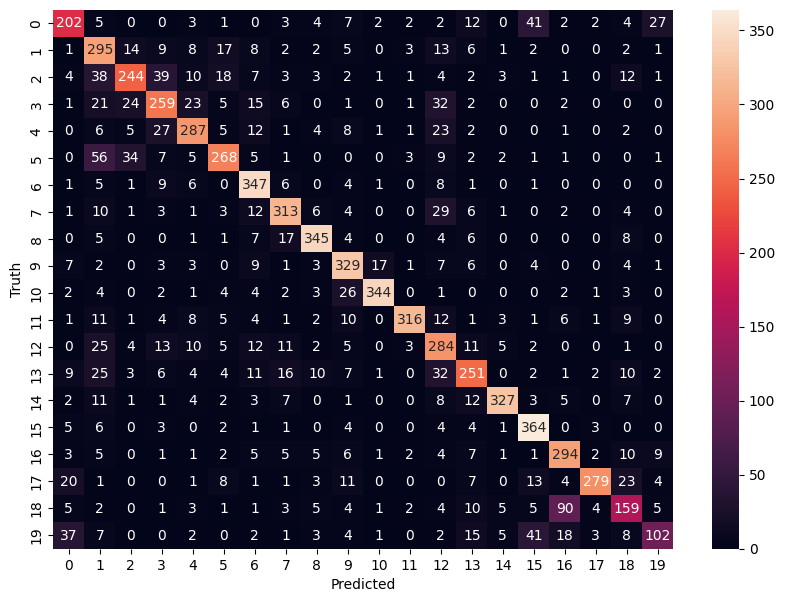

[[202   5   0   0   3   1   0   3   4   7   2   2   2  12   0  41   2   2
    4  27]
 [  1 295  14   9   8  17   8   2   2   5   0   3  13   6   1   2   0   0
    2   1]
 [  4  38 244  39  10  18   7   3   3   2   1   1   4   2   3   1   1   0
   12   1]
 [  1  21  24 259  23   5  15   6   0   1   0   1  32   2   0   0   2   0
    0   0]
 [  0   6   5  27 287   5  12   1   4   8   1   1  23   2   0   0   1   0
    2   0]
 [  0  56  34   7   5 268   5   1   0   0   0   3   9   2   2   1   1   0
    0   1]
 [  1   5   1   9   6   0 347   6   0   4   1   0   8   1   0   1   0   0
    0   0]
 [  1  10   1   3   1   3  12 313   6   4   0   0  29   6   1   0   2   0
    4   0]
 [  0   5   0   0   1   1   7  17 345   4   0   0   4   6   0   0   0   0
    8   0]
 [  7   2   0   3   3   0   9   1   3 329  17   1   7   6   0   4   0   0
    4   1]
 [  2   4   0   2   1   4   4   2   3  26 344   0   1   0   0   0   2   1
    3   0]
 [  1  11   1   4   8   5   4   1   2  10   0 316  12   1   3   1

In [30]:
train_and_evaluate_with_confusion(
  "svc",
  svc,
  training.data,
  training.target,
  test.data,
  test.target,
)

Notes on model performance:

Logistic regression and SVC had similar accuracy and precisions
We found that there are some consistent false positives in both Logistic regression and SVC model predictions using the accuracy values and precision values.  At this current stage in the project, we have trained three models.

## Moving Forward with logisticREgression

We decided to go with logisticRegression because it's the fastest to run! And for our learning goals, speed is important. 

Now we will do some hyperparameter fine tuning.

### Hyperparameter Fine Tuning for logisic regression

In [17]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# We generated this param_grid by looking at the docs for hours... pain staking!!!
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
    'max_iter': [100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=3,  # Use 3 folds in cross validation
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1,
)

grid_search.fit(
  training.data,
  training.target
)

First param_grid run had the following results:
#Fitting 3 folds for each of 720 candidates, totalling 2160 fits
#Crashed after 3 hours 


## Our first attempt at training the models with Grid Search led to a failure
## Our next attempt will include less parameters in our model training (Test C and Solver) 

In [18]:
# We generated this param_grid by looking at the docs for hours... pain staking!!!
param_grid_modified = {
    'C': [0.01, 100],
    'solver': ['liblinear', 'saga'],
}

grid_search_modified = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_modified,
    cv=3,  # Use 3 folds in cross validation
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1,
)

grid_search_modified.fit(
  training.data,
  training.target
)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 100], 'solver': ['liblinear', 'saga']},
             scoring='neg_mean_absolute_error', verbose=2)

In [21]:
best_parameters = grid_search_modified.best_params_

print(f"Best parameters: {best_parameters}")

best_model = LogisticRegression(**best_parameters)

Best parameters: {'C': 100, 'solver': 'liblinear'}


## Result of second parameter Grid Search after simplifying the parameters (C) and (Solver)
#param_grid_modified = {
    'C': [0.01, 100],
    'solver': ['liblinear', 'saga'],
}
#Results: Best parameters: {'C': 100, 'solver': 'liblinear'}

Testing the updated LogisticRegression with modified parameters

Training hyper_tuned_logistic_regression...
Training time: 28.0878 seconds
Accuracy: 0.8176
Precision: 0.8188


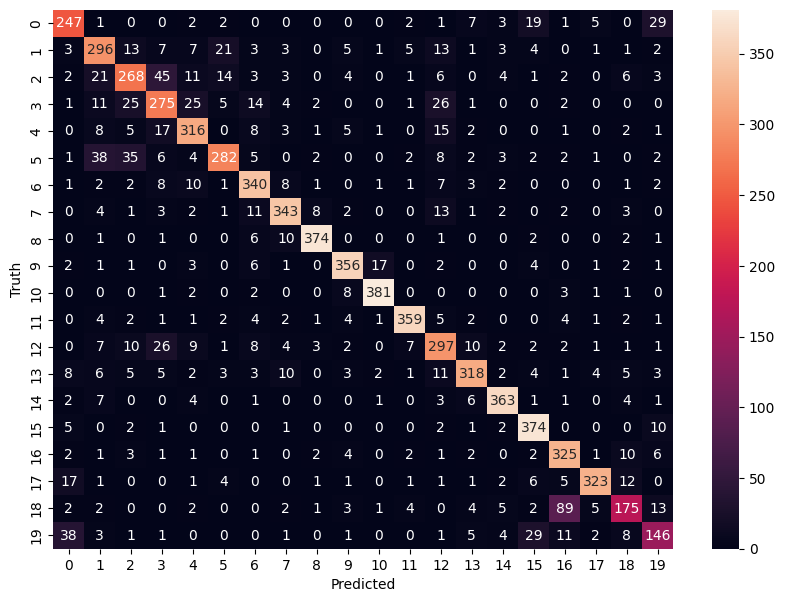

[[247   1   0   0   2   2   0   0   0   0   0   2   1   7   3  19   1   5
    0  29]
 [  3 296  13   7   7  21   3   3   0   5   1   5  13   1   3   4   0   1
    1   2]
 [  2  21 268  45  11  14   3   3   0   4   0   1   6   0   4   1   2   0
    6   3]
 [  1  11  25 275  25   5  14   4   2   0   0   1  26   1   0   0   2   0
    0   0]
 [  0   8   5  17 316   0   8   3   1   5   1   0  15   2   0   0   1   0
    2   1]
 [  1  38  35   6   4 282   5   0   2   0   0   2   8   2   3   2   2   1
    0   2]
 [  1   2   2   8  10   1 340   8   1   0   1   1   7   3   2   0   0   0
    1   2]
 [  0   4   1   3   2   1  11 343   8   2   0   0  13   1   2   0   2   0
    3   0]
 [  0   1   0   1   0   0   6  10 374   0   0   0   1   0   0   2   0   0
    2   1]
 [  2   1   1   0   3   0   6   1   0 356  17   0   2   0   0   4   0   1
    2   1]
 [  0   0   0   1   2   0   2   0   0   8 381   0   0   0   0   0   3   1
    1   0]
 [  0   4   2   1   1   2   4   2   1   4   1 359   5   2   0   0

In [22]:
train_and_evaluate_with_confusion(
  "hyper_tuned_logistic_regression",
  best_model,
  training.data,
  training.target,
  test.data,
  test.target,
)

###  Original Logistic Regression Results with "Vanilla" Parameters:  
 Training logisticRegression...  
 Training time: 37.0675 seconds  
 Accuracy: 0.7257  
 Precision: 0.7273  
 

### Modified Logistic Regression Results with C Solver Parameters - Best parameters: {'C': 100, 'solver': 'liblinear'}  
 Training hyper_tuned_logistic_regression...  
 Training time: 28.0878 seconds  
 Accuracy: 0.8176  
 Precision: 0.8188  

### HyperParameter tuning attempt 2  
Attempting to increase the number of C from 100 to 1000 to review the results of the trained model  
Also limited the Solvers from liblinear and saga to just liblinear  




In [23]:
param_grid_modified_2 = {
    'C': [100, 200, 1000],
    'solver': ['liblinear'],
}

grid_search_modified_2 = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_modified_2,
    cv=3,  # Use 3 folds in cross validation
    scoring="neg_mean_absolute_error",
    verbose=2,
    n_jobs=-1,
)

grid_search_modified_2.fit(
  training.data,
  training.target
)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 200, 1000], 'solver': ['liblinear']},
             scoring='neg_mean_absolute_error', verbose=2)

In [24]:
best_parameters_2 = grid_search_modified_2.best_params_

print(f"Best parameters 2: {best_parameters_2}")

best_model_2 = LogisticRegression(**best_parameters_2)

Best parameters 2: {'C': 1000, 'solver': 'liblinear'}


Training hyper_tuned_logistic_regression_2...
Training time: 30.3893 seconds
Accuracy: 0.8209
Precision: 0.8217


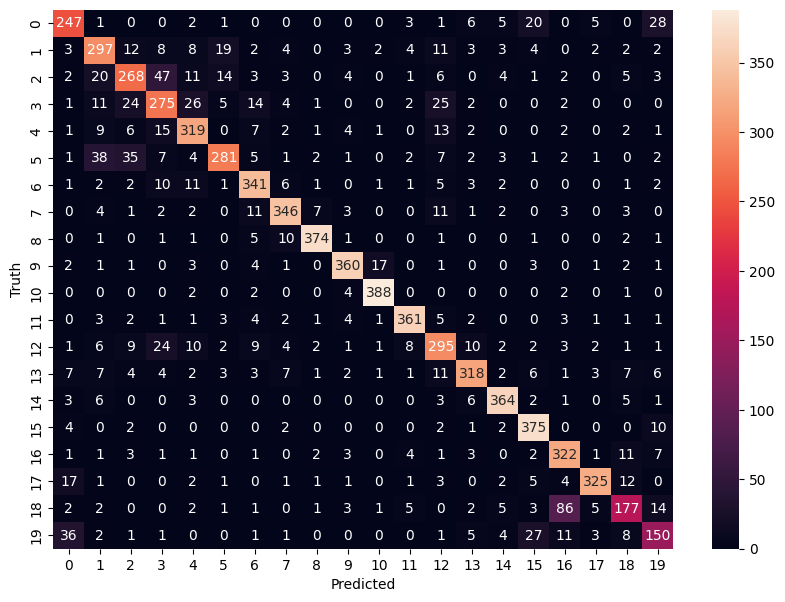

[[247   1   0   0   2   1   0   0   0   0   0   3   1   6   5  20   0   5
    0  28]
 [  3 297  12   8   8  19   2   4   0   3   2   4  11   3   3   4   0   2
    2   2]
 [  2  20 268  47  11  14   3   3   0   4   0   1   6   0   4   1   2   0
    5   3]
 [  1  11  24 275  26   5  14   4   1   0   0   2  25   2   0   0   2   0
    0   0]
 [  1   9   6  15 319   0   7   2   1   4   1   0  13   2   0   0   2   0
    2   1]
 [  1  38  35   7   4 281   5   1   2   1   0   2   7   2   3   1   2   1
    0   2]
 [  1   2   2  10  11   1 341   6   1   0   1   1   5   3   2   0   0   0
    1   2]
 [  0   4   1   2   2   0  11 346   7   3   0   0  11   1   2   0   3   0
    3   0]
 [  0   1   0   1   1   0   5  10 374   1   0   0   1   0   0   1   0   0
    2   1]
 [  2   1   1   0   3   0   4   1   0 360  17   0   1   0   0   3   0   1
    2   1]
 [  0   0   0   0   2   0   2   0   0   4 388   0   0   0   0   0   2   0
    1   0]
 [  0   3   2   1   1   3   4   2   1   4   1 361   5   2   0   0

In [25]:
train_and_evaluate_with_confusion(
  "hyper_tuned_logistic_regression_2",
  best_model_2,
  training.data,
  training.target,
  test.data,
  test.target,
)

### CONCLUSION

We improved our vanilla LogisticRegression model from 71% accuracy to 82% with very minor increases in time to train.  

That's a 11% increase!  

Obviously lots of further investigation to do, but for now we're happy with the results and moving onto to doing our own vectorization